In [1]:
# Used packages
from preprocess import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns
from preparation import preparation
from model import embed

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [3]:

# Actual results of our tests. 1 = Plagiarism, 0 = Original
actual_results = [1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
# aesults found by our system when doing the plagiarism analysis
system_results = []

'''
Main decision function that handles all the main logic in our system.
First, it gathers all the original and suspicious documents for preprocessing.
Then, it calls for the calculation of the cosine similarity between a suspicious and an original text.
Afterwards, it determines whether there is plagiarism or not and it calculates the word frequency histograms.
Finally, it displays all the histograms, ROC Curve and Confussion Matrix.

Receives a file path to the original and suspicious files
Does not return anything but it concludes by showing all the result graphs.
'''
def decision(file_path_originals, file_path_suspicious):
   
    # Preprocessing original texts
    original_texts = [file for file in os.listdir(file_path_originals) if os.path.isfile(os.path.join(file_path_originals, file))]
    processed_original_texts = []
    for original_text in original_texts:
        text = preprocessing(file_path_originals + "/" + original_text)
        processed_original_texts.append(text)

    print("Starting plagiarism detection...")
    print("\n")
    # Preprocessing suspicious texts
    suspicious_texts = [file for file in os.listdir(file_path_suspicious) if os.path.isfile(os.path.join(file_path_suspicious, file))]
    processed_suspicious_texts = []
    for suspicious_text in suspicious_texts:
        text = preprocessing(file_path_suspicious + "/" + suspicious_text)
        processed_suspicious_texts.append(text)

    original_embeddings = []
    for i, processed_original_text in enumerate(processed_original_texts):
        original_embeddings.append([])
        for l in range(len(processed_original_text)):
            original_embeddings[i].append(embed([processed_original_text[l]]))

    # Comparing suspicious text with original texts
    for k, processed_suspicious_text in enumerate(processed_suspicious_texts):
        print("Analyzing Suspicious text: ", suspicious_texts[k])
        plagiarized_check = False
        suspicious_plagiarsim_words = 0
        suspicious_embeddings = []
        for i in range(len(processed_suspicious_text)):
            suspicious_embeddings.append(embed([processed_suspicious_text[i]]))

        for i, processed_original_text in enumerate(processed_original_texts):
            word_count_plagiarism = preparation(suspicious_embeddings, original_embeddings[i], processed_suspicious_text)
            plagiarism_original_word_count = word_count_plagiarism/len(".".join(processed_suspicious_text).split())
            # Check if plagiarism is detected
            if word_count_plagiarism > 0:
                print("\tPlagiarism detected in file: ", original_texts[i])
                print(f'\tPercentage of plagiarism detected: {plagiarism_original_word_count*100:.1f}%')
                print("\t⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️\n")
                suspicious_plagiarsim_words += word_count_plagiarism
                
                if not plagiarized_check:
                    system_results.append(1)
                    plagiarized_check = True
                
                    
        # When there is no plagiarism, append 0 to system results
        if not plagiarized_check:
            print("\tNo plagiarism detected\n")
            system_results.append(0)

        if suspicious_plagiarsim_words/len(".".join(processed_original_text).split()) > 0.15:
            percentaje_plagiarism = suspicious_plagiarsim_words/len(".".join(processed_suspicious_text).split())*100
            if percentaje_plagiarism > 100:
                percentaje_plagiarism = 100
            print(f'\tTotal percentage of plagiarism in {suspicious_texts[k]}: {percentaje_plagiarism:.1f}%')
            print("\t❗❗❗❗❗\n")

    # Print results
    tn, fp, fn, tp = confusion_matrix(actual_results, system_results).ravel()
    print(f'Predicted Results: {system_results}')
    print(f'Actual Results: {actual_results}')
    fpr, tpr, thresholds = metrics.roc_curve(actual_results, system_results, pos_label=1)
    print(f'True Positive: {tp}')
    print(f'False Positive: {fp}')
    print(f'True Negative: {tn}')
    print(f'False Negative: {fn}')
    print("False Positive Rate: ", fp/(fp+tn))
    print("True Positive Rate: ", tp/(tp+fn))
    print("AUC:", metrics.auc(fpr, tpr))

    # Display graphs
    print_confussion_matrix(actual_results, system_results)
    print_roc(fpr, tpr, metrics.auc(fpr, tpr))


Starting plagiarism detection...


Analyzing Suspicious text:  FID-01.txt
	Plagiarism detected in file:  org-001.txt
	Percentage of plagiarism detected: 72.0%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Plagiarism detected in file:  org-010.txt
	Percentage of plagiarism detected: 29.5%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Total percentage of plagiarism in FID-01.txt: 100.0%
	❗❗❗❗❗

Analyzing Suspicious text:  FID-02.txt
	Plagiarism detected in file:  org-070.txt
	Percentage of plagiarism detected: 39.2%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Total percentage of plagiarism in FID-02.txt: 39.2%
	❗❗❗❗❗

Analyzing Suspicious text:  FID-03.txt
	No plagiarism detected

Analyzing Suspicious text:  FID-04.txt
	No plagiarism detected

Analyzing Suspicious text:  FID-05.txt
	Plagiarism detected in file:  org-017.txt
	Percentage of plagiarism detected: 27.1%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Plagiarism detected in file:  org-060.txt
	Percentage of plagiarism detected: 75.4%
	⚠️ ⚠️ ⚠️ ⚠️ ⚠️ ⚠️

	Total percentage of plagiarism in FID-05.txt: 100.0%
	❗❗❗❗❗

Analyzing 

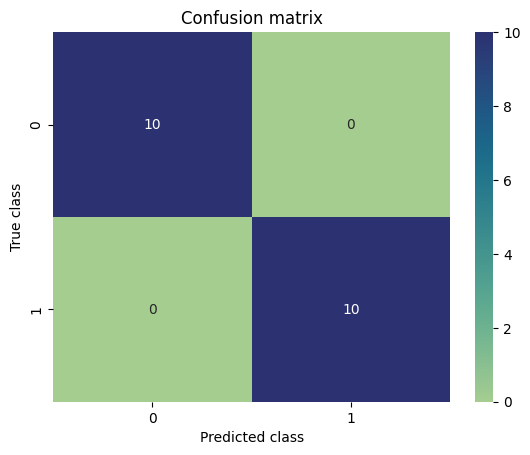

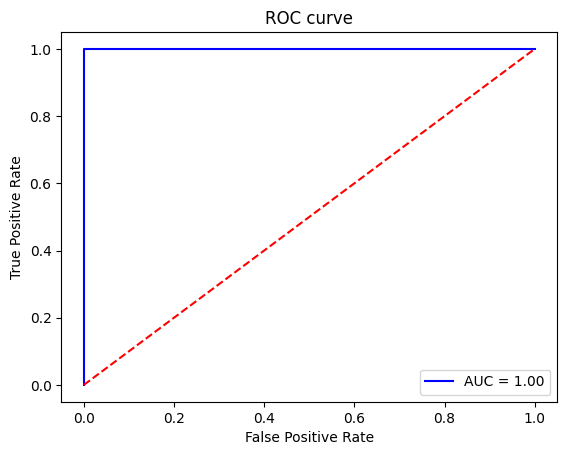

In [4]:
# Call the main system function to kick-off the plagiarism detector
decision("original_files", "suspicious_files")